In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
activity = pd.read_csv('fitbit_activity.csv')

In [187]:
activity.columns

Index(['Date', 'Calories Burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'day', 'weekend',
       'prev_Calories Burned', 'prev_Steps', 'prev_Distance', 'prev_Floors',
       'prev_Minutes Sedentary', 'prev_Minutes Lightly Active',
       'prev_Minutes Fairly Active', 'prev_Minutes Very Active',
       'prev_Activity Calories'],
      dtype='object')

In [102]:
#Datetime features

import datetime


In [103]:
activity['Date'] = activity['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))

In [104]:
activity['day'] = activity['Date'].apply(lambda x: x.weekday())
activity['weekend'] = activity['day'].apply(lambda x: 0 if x<5 else 1)
activity['Calories Burned'] = activity['Calories Burned'].apply(lambda x: int(str(x).replace(',','')))
activity['Steps'] = activity['Steps'].apply(lambda x: int(str(x).replace(',','')))
activity['Activity Calories'] = activity['Activity Calories'].apply(lambda x: int(str(x).replace(',','')))
activity['Minutes Sedentary'] = activity['Minutes Sedentary'].apply(lambda x: int(str(x).replace(',','')))
activity['Minutes Lightly Active'] = activity['Minutes Lightly Active'].apply(lambda x: int(str(x).replace(',','')))
activity['Minutes Fairly Active'] = activity['Minutes Fairly Active'].apply(lambda x: int(str(x).replace(',','')))
activity['Minutes Very Active'] = activity['Minutes Very Active'].apply(lambda x: int(str(x).replace(',','')))

In [105]:
activity.sort_values(['Date'])

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,day,weekend
31,2018-06-01,2963,10706,6.28,7,752,221,40,46,1527,4,0
32,2018-06-02,2629,8967,5.29,14,589,202,12,28,1114,5,1
33,2018-06-03,2411,5189,2.91,2,847,176,22,5,862,6,1
34,2018-06-04,2981,8987,5.49,7,703,247,12,48,1502,0,0
35,2018-06-05,2382,6405,4.08,8,648,175,7,14,841,1,0
36,2018-06-06,2896,10226,6.50,12,752,199,30,47,1407,2,0
37,2018-06-07,3001,11224,7.18,7,715,194,26,70,1550,3,0
38,2018-06-08,2587,8040,4.20,12,737,216,8,11,1072,4,0
39,2018-06-09,3756,17206,13.06,29,473,200,43,141,2425,5,1
40,2018-06-10,3716,21144,15.49,22,572,230,39,136,2410,6,1


In [106]:
#Plot time series to visually check seasonality/trend
import seaborn as sns
activity=activity.set_index(activity.Date)

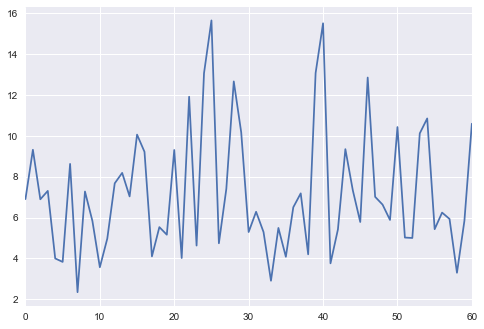

In [107]:
sns.tsplot([activity.Distance])
plt.show()

No visible pattern in the data

In [108]:
activity.columns


Index(['Date', 'Calories Burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'day', 'weekend'],
      dtype='object')

Shifting the data by one row to see if data from the previous day affects the current day or not

In [109]:
activity['prev_Calories Burned'] = activity['Calories Burned'].shift(1)
activity['prev_Steps'] = activity['Steps'].shift(1)
activity['prev_Distance'] = activity['Distance'].shift(1)
activity['prev_Floors'] = activity['Floors'].shift(1)
activity['prev_Minutes Sedentary'] = activity['Minutes Sedentary'].shift(1)
activity['prev_Minutes Lightly Active'] = activity['Minutes Lightly Active'].shift(1)
activity['prev_Minutes Fairly Active'] = activity['Minutes Fairly Active'].shift(1)
activity['prev_Minutes Very Active'] = activity['Minutes Very Active'].shift(1)
activity['prev_Activity Calories'] = activity['Activity Calories'].shift(1)

In [110]:
activity.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,weekend,prev_Calories Burned,prev_Steps,prev_Distance,prev_Floors,prev_Minutes Sedentary,prev_Minutes Lightly Active,prev_Minutes Fairly Active,prev_Minutes Very Active,prev_Activity Calories
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01,2018-07-01,3734,11614,6.90,51,511,405,69,27,2447,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-02,2018-07-02,3516,13852,9.31,103,621,185,48,115,2091,...,0,3734.0,11614.0,6.90,51.0,511.0,405.0,69.0,27.0,2447.0
2018-07-03,2018-07-03,3018,11022,6.89,44,689,292,25,20,1558,...,0,3516.0,13852.0,9.31,103.0,621.0,185.0,48.0,115.0,2091.0
2018-07-04,2018-07-04,2920,11140,7.30,32,626,277,23,24,1476,...,0,3018.0,11022.0,6.89,44.0,689.0,292.0,25.0,20.0,1558.0
2018-07-05,2018-07-05,2351,6408,4.00,7,1104,185,0,0,801,...,0,2920.0,11140.0,7.30,32.0,626.0,277.0,23.0,24.0,1476.0


Correlation plot

In [111]:
activity = activity[activity['prev_Calories Burned'].notna()]

activity_corr = activity[['Calories Burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'day', 'weekend',
       'prev_Calories Burned', 'prev_Steps', 'prev_Distance', 'prev_Floors',
       'prev_Minutes Sedentary', 'prev_Minutes Lightly Active',
       'prev_Minutes Fairly Active', 'prev_Minutes Very Active',
       'prev_Activity Calories']]

In [112]:
corr = activity_corr.corr()

In [113]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

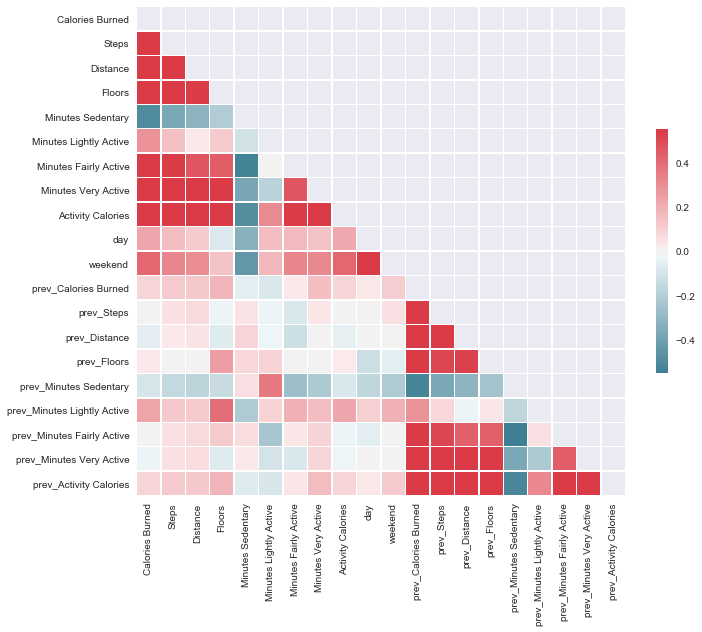

In [114]:
plt.show()

In [115]:
corr

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,day,weekend,prev_Calories Burned,prev_Steps,prev_Distance,prev_Floors,prev_Minutes Sedentary,prev_Minutes Lightly Active,prev_Minutes Fairly Active,prev_Minutes Very Active,prev_Activity Calories
Calories Burned,1.000000,0.932599,0.889622,0.639868,-0.493475,0.287144,0.642334,0.859096,0.998063,0.227681,0.417786,0.088019,-0.020074,-0.054083,0.026922,-0.097436,0.234388,-0.020556,-0.027966,0.088315
Steps,0.932599,1.000000,0.974294,0.553414,-0.370957,0.153699,0.548271,0.882030,0.931616,0.161400,0.325428,0.116845,0.054017,0.026005,0.009649,-0.151502,0.124145,0.056411,0.054293,0.118060
Distance,0.889622,0.974294,1.000000,0.549219,-0.318147,0.034194,0.470625,0.905672,0.883788,0.116176,0.298529,0.121589,0.073277,0.046812,-0.002973,-0.170802,0.115548,0.071290,0.063697,0.124678
Floors,0.639868,0.553414,0.549219,1.000000,-0.206664,0.114501,0.442315,0.552033,0.621587,-0.079734,0.141324,0.179033,-0.029037,-0.067874,0.254486,-0.142240,0.396274,0.119803,-0.069890,0.181371
Minutes Sedentary,-0.493475,-0.370957,-0.318147,-0.206664,1.000000,-0.112013,-0.533395,-0.379061,-0.492371,-0.328912,-0.444520,-0.059401,0.047474,0.089827,0.078226,0.058255,-0.212853,0.068158,0.027077,-0.066035
Minutes Lightly Active,0.287144,0.153699,0.034194,0.114501,-0.112013,1.000000,0.021185,-0.179429,0.312987,0.156294,0.173931,-0.085745,-0.033600,-0.025765,0.093102,0.365341,0.091089,-0.237773,-0.107090,-0.094851
Minutes Fairly Active,0.642334,0.548271,0.470625,0.442315,-0.533395,0.021185,1.000000,0.467802,0.655479,0.166650,0.324975,0.028963,-0.085603,-0.124313,0.005329,-0.267965,0.194802,0.035112,-0.085274,0.035390
Minutes Very Active,0.859096,0.882030,0.905672,0.552033,-0.379061,-0.179429,0.467802,1.000000,0.842887,0.143008,0.317646,0.159902,0.038138,0.008061,-0.011231,-0.219470,0.156576,0.091436,0.083399,0.163093
Activity Calories,0.998063,0.931616,0.883788,0.621587,-0.492371,0.312987,0.655479,0.842887,1.000000,0.223299,0.415237,0.084060,-0.015350,-0.047543,0.024814,-0.086364,0.225508,-0.028513,-0.024349,0.084441
day,0.227681,0.161400,0.116176,-0.079734,-0.328912,0.156294,0.166650,0.143008,0.223299,1.000000,0.784041,0.030589,0.013992,-0.004931,-0.127894,-0.161758,0.107184,-0.056930,-0.016283,0.032796


As expected, weekend has a decently high correlation with minutes active, either due to the fact that activity is fairly consistent during work or exercise is significantly higher the weekends. I will stick to the former.

An observation I am proud of is that my activity is not highly correlated (negatively) with my activity on the previous day, implying that I don't rest because I went for a run or worked out the previous day.

However my aim is to get a good night's sleep - sleep where my activity is at a minimum.

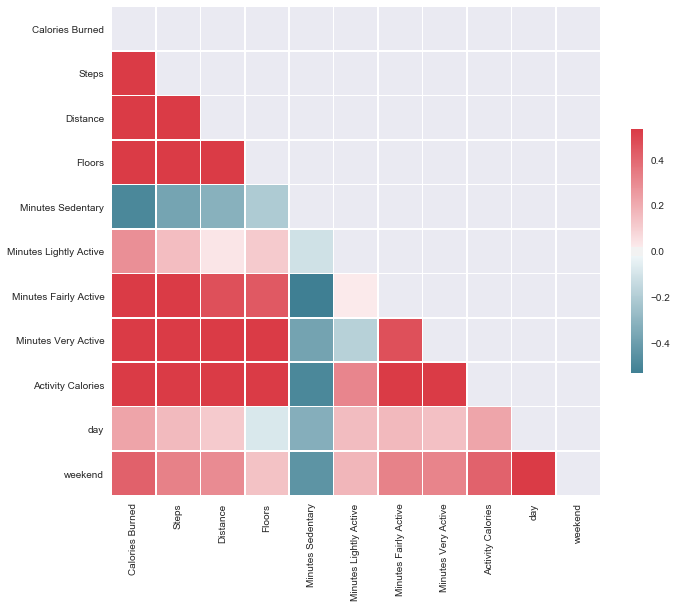

In [191]:
# Mini corr plot
activity_corr_mini = activity[['Calories Burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'day', 'weekend']]
corr = activity_corr_mini.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [116]:
sleep = pd.read_csv('fitbit_sleep.csv')

In [180]:
sleep.columns

Index(['Start Time', 'End Time', 'Date', 'Minutes Asleep', 'Minutes Awake',
       'Number of Awakenings', 'Time in Bed', 'Minutes REM Sleep',
       'Minutes Light Sleep', 'Minutes Deep Sleep'],
      dtype='object')

In [118]:
sns.tsplot(sleep['Minutes Asleep'])

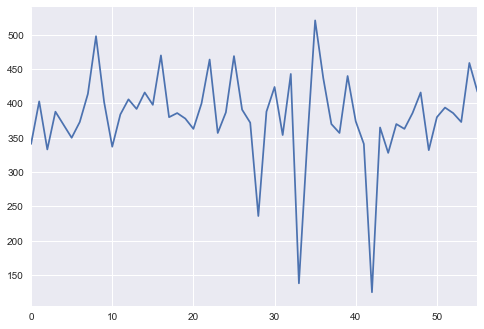

In [119]:
plt.show()

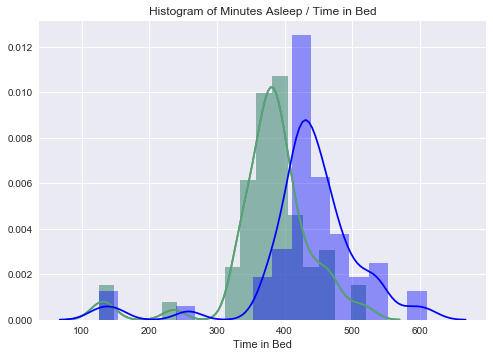

In [186]:
a = sns.distplot(sleep['Minutes Asleep']).set_title('Histogram of Minutes Asleep / Time in Bed')
a = sns.distplot(sleep['Time in Bed'], color = 'blue')
plt.show(a)

The green plot above is the 'Time in Bed' while the blue plot is 'Minutes Asleep'. I wanted to find out if there 'isnt' a pattern between the two. But from the plot above you can see that the two are closely related as you would've assumed.

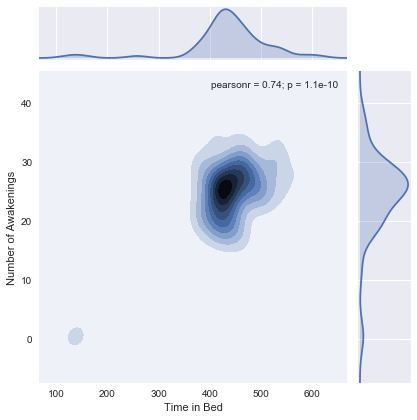

In [121]:
sns.jointplot(sleep['Time in Bed'], sleep['Number of Awakenings'], kind = 'kde')
plt.show()

The pearson residuals have a value of 0.74 which is high but not close to 1. This might imply that yes there is a strong positive relationship between the Time Spent in Bed vs the Number of Awakenings but that is not the only influencing factor. Number of Awakenings might depend on stress or exertion that day or a number of other factors.

In [184]:
np.mean(sleep['Minutes Asleep'])/60
np.std(sleep['Minutes Asleep'])/60


379.92857142857144

My mean sleep on 6.33 hours is what I like but the standard deviation is too high. Ideally standard deviation should be less than 20 mins to call it a good routine. I hence want to know what leads to a good night's sleep. 

In [122]:
sleep['Date'] = sleep['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))
sleepactivity = sleep.merge(activity, on = 'Date')

C:\Users\Jeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


In [192]:
sleepactivity.columns

Index(['Start Time', 'End Time', 'Date', 'Minutes Asleep', 'Minutes Awake',
       'Number of Awakenings', 'Time in Bed', 'Minutes REM Sleep',
       'Minutes Light Sleep', 'Minutes Deep Sleep', 'Calories Burned', 'Steps',
       'Distance', 'Floors', 'Minutes Sedentary', 'Minutes Lightly Active',
       'Minutes Fairly Active', 'Minutes Very Active', 'Activity Calories',
       'day', 'weekend', 'prev_Calories Burned', 'prev_Steps', 'prev_Distance',
       'prev_Floors', 'prev_Minutes Sedentary', 'prev_Minutes Lightly Active',
       'prev_Minutes Fairly Active', 'prev_Minutes Very Active',
       'prev_Activity Calories'],
      dtype='object')

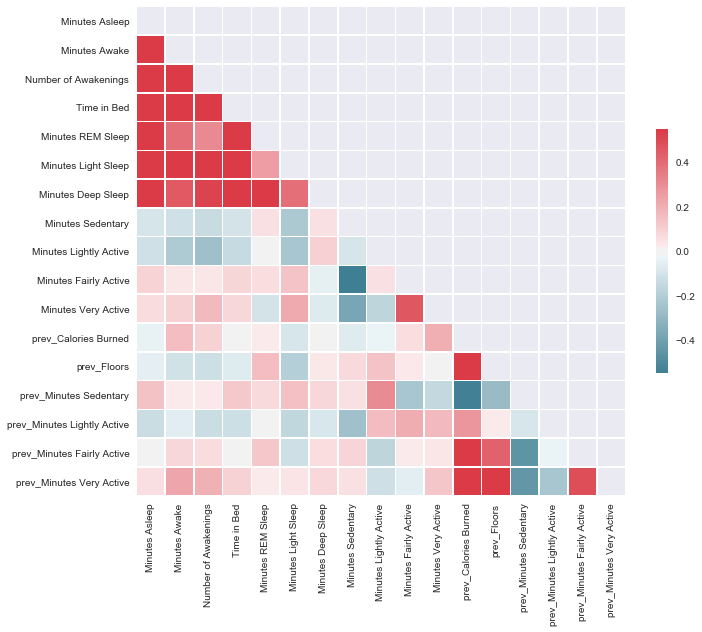

In [206]:
sleepactivity2 = sleepactivity[['Minutes Asleep', 'Minutes Awake',
       'Number of Awakenings', 'Time in Bed', 'Minutes REM Sleep',
       'Minutes Light Sleep', 'Minutes Deep Sleep','Minutes Sedentary', 'Minutes Lightly Active',
       'Minutes Fairly Active', 'Minutes Very Active', 'prev_Calories Burned',
       'prev_Floors', 'prev_Minutes Sedentary', 'prev_Minutes Lightly Active',
       'prev_Minutes Fairly Active', 'prev_Minutes Very Active']]
corr = sleepactivity2.corr()
mask2 = np.zeros_like(corr, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask2, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

I had to dig deep to get some pattern out of the data. Yes this is not how analysis should be done, but I really wanted some understanding between my activity and sleep patterns.

1. Minutes Lightly active has a negative correlation with Minutes Awake, Number of Awakenings and Time in bed. This implies that I get better quality sleep when I am 'lightly' active that day. Furthermore sleep is also better the next night. All this is obviously controlling for other parameters.
2. Minutes Very Active has a slight positive correlation with Minutes Asleep, Number of Awakenings and Time in bed, both for the current night's sleep and the next one. This is because high physical exertion (soccer/football and a 5 km run in my case) leads to higher muscle recovery which often kicks you out of sleep phases. 

In [124]:
y = sleepactivity['Minutes Asleep']
X = sleepactivity[['Calories Burned', 'Steps',
       'Distance', 'Floors', 'Minutes Sedentary', 'Minutes Lightly Active',
       'Minutes Fairly Active', 'Minutes Very Active', 'Activity Calories',
        'weekend', 'prev_Calories Burned', 'prev_Steps', 'prev_Distance',
       'prev_Floors', 'prev_Minutes Sedentary', 'prev_Minutes Lightly Active',
       'prev_Minutes Fairly Active', 'prev_Minutes Very Active',
       'prev_Activity Calories']]

I have been tracking my browser pattern for June and July and want to see if there is any relationship between my activity, sleep and browsing pattern

In [129]:
website = pd.read_csv('webtime-tracker.csv')

In [130]:
website.head()

,Date,General,Georgia Tech,News,Social Media,Sports,Video Streaming,Work,Total
0,6/1/2018,265,0,0,0,0,0,0,265
1,6/2/2018,3853,0,0,0,208,121,0,4182
2,6/3/2018,2373,0,0,345,584,6267,0,9569
3,6/4/2018,1103,158,0,10,0,3379,0,4650
4,6/5/2018,360,6,0,0,0,2843,0,3209


In [131]:
# getting date attributes
website['Date'] = website['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))
website['day'] = website['Date'].apply(lambda x: x.weekday())
website['weekend'] = website['day'].apply(lambda x: 0 if x<5 else 1)

Some checks on my data to see if it is as per what you would think

C:\Users\Jeh\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


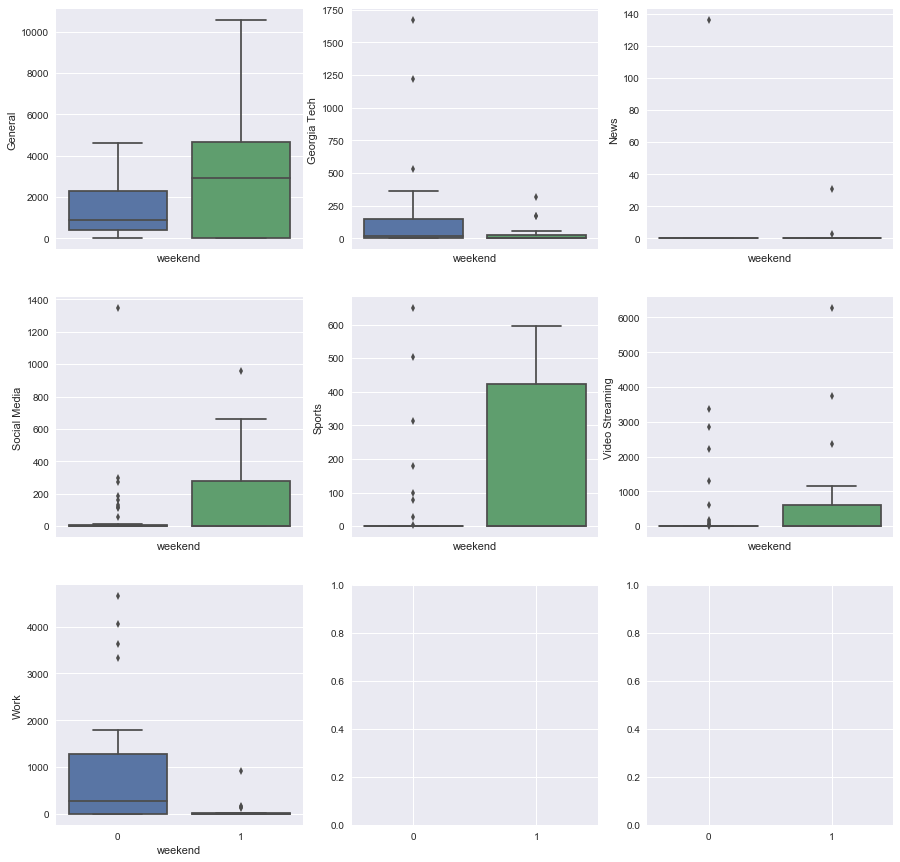

In [132]:
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True)
sns.despine(left=True)
sns.boxplot(website['weekend'], website['General'],ax=axes[0, 0])
sns.boxplot(website['weekend'], website['Georgia Tech'],ax=axes[0, 1])
sns.boxplot(website['weekend'], website['News'],ax=axes[0, 2])
sns.boxplot(website['weekend'], website['Social Media'],ax=axes[1, 0])
sns.boxplot(website['weekend'], website['Sports'],ax=axes[1, 1])
sns.boxplot(website['weekend'], website['Video Streaming'],ax=axes[1, 2])
sns.boxplot(website['weekend'], website['Work'],ax=axes[2, 0])
plt.show(f)

1. Georgia Tech related browsing goes on up weekdays, which is surprising since I would have wanted to work on school stuff on the weekend. I'm a lazy guy on weekends
2. Social Media is much lower during the week. (Yes I was a diligent intern at work :P)
3. Video Streaming and Sports are really high during the weekends. There are sport values that are a bit higher during the week which can be attributed to the 'World Cup'!
4. Finally I never got my work back home and the data doesnt lie (Maybe did a bit on the weekend. Starting and shutting down AWS clusters I guess)

Finally I'll stitch all the 3 datasets together to see if there is any connection at all.

In [133]:
sleepactivityweb = sleepactivity.merge(website, on = 'Date')

In [134]:
sleepactivityweb.columns

Index(['Start Time', 'End Time', 'Date', 'Minutes Asleep', 'Minutes Awake',
       'Number of Awakenings', 'Time in Bed', 'Minutes REM Sleep',
       'Minutes Light Sleep', 'Minutes Deep Sleep', 'Calories Burned', 'Steps',
       'Distance', 'Floors', 'Minutes Sedentary', 'Minutes Lightly Active',
       'Minutes Fairly Active', 'Minutes Very Active', 'Activity Calories',
       'day_x', 'weekend_x', 'prev_Calories Burned', 'prev_Steps',
       'prev_Distance', 'prev_Floors', 'prev_Minutes Sedentary',
       'prev_Minutes Lightly Active', 'prev_Minutes Fairly Active',
       'prev_Minutes Very Active', 'prev_Activity Calories', 'General',
       'Georgia Tech', 'News', 'Social Media', 'Sports', 'Video Streaming',
       'Work', 'Total', 'day_y', 'weekend_y'],
      dtype='object')

In [135]:
sleepactivityweb = sleepactivityweb[['Date', 'Minutes Asleep', 'Minutes Awake',
       'Number of Awakenings', 'Time in Bed', 'Minutes REM Sleep',
       'Minutes Light Sleep', 'Minutes Deep Sleep', 'Calories Burned', 'Steps',
       'Distance', 'Floors', 'Minutes Sedentary', 'Minutes Lightly Active',
       'Minutes Fairly Active', 'Minutes Very Active', 'Activity Calories',
       'day_x', 'weekend_x', 'prev_Calories Burned', 'prev_Steps',
       'prev_Distance', 'prev_Floors', 'prev_Minutes Sedentary',
       'prev_Minutes Lightly Active', 'prev_Minutes Fairly Active',
       'prev_Minutes Very Active', 'prev_Activity Calories', 'General',
       'Georgia Tech', 'News', 'Social Media', 'Sports', 'Video Streaming',
       'Work', 'Total']]

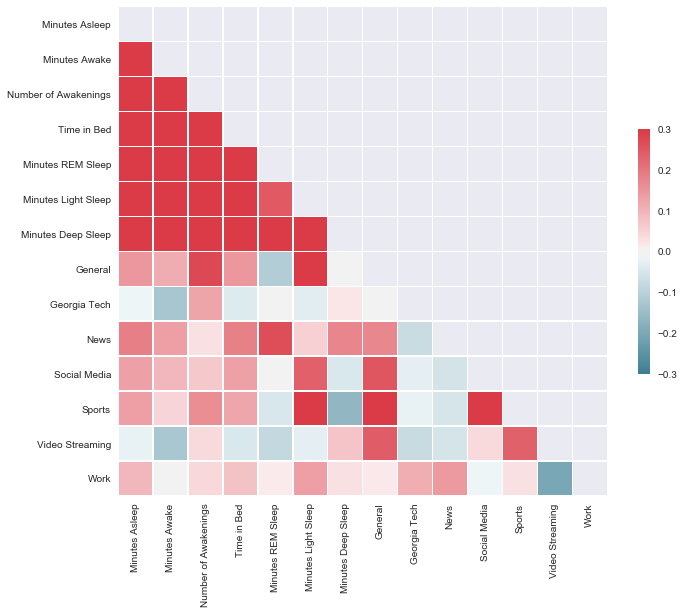

In [136]:
corr = sleepactivityweb[['Minutes Asleep', 'Minutes Awake',
       'Number of Awakenings', 'Time in Bed', 'Minutes REM Sleep',
       'Minutes Light Sleep', 'Minutes Deep Sleep', 'General',
       'Georgia Tech', 'News', 'Social Media', 'Sports', 'Video Streaming',
       'Work']].corr()
mask2 = np.zeros_like(corr, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask2, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

I don't know why but I like corr plots a lot. From this one I'd like to point out the relationship between Sports browsing and sleep. 
1. Sports browsing is negatively correlated with Deep Sleep that night while positively correlated with Light Sleep the same night.
    
    *Deep sleep promotes physical recovery and aspects of memory and learning. This stage has also been shown to support your immune system. Light sleep promotes mental and physical recovery.*
    
    This is what the Fitbit website mentions. So does watching more sports lead to more light sleep for mental recovery? I get very involved in football/soccer games (even if Arsenal isn't playing) and this very well might be true. But then however **correlation does not mean causation!**
    
    
2. Less video streaming during work! Yes I am a good employee!


3. So social media in my case has a direct relationship with Minutes Asleep. But there is the inverse relationship between Social Media browsing and Deep Sleep. How does that make sense? More social media = More sleep = Less deep sleep but more Light sleep (Mental recovery?)

<h2>Model to predict sleep</h2>

With the intention of predicting a good sleep, I chose a GBM, since the assumptions are just regarding the independence. I initially thought the Regression would better help me understand the relationships but there are a lot of assumptions that I need to validate before ascertaining the authenticity of the model.

**Zeo Sleep Score** is a well known metric to rate your sleep. It however assumes that you should sleep at least 8.5 hours and thats where a bias enters the metric. 

**Minutes Asleep** is something that decides how you feel the next day. A good amount of deep sleep leads to a refreshing start the next day and this is what I ultimately want in my life. A good start to the next day.

So lets use this as the response variable.

In [137]:
#Some data preprocessing

#Convert seconds to minutes
sleepactivityweb['General'] = sleepactivityweb['General'].apply(lambda x: x/60)
sleepactivityweb['Georgia Tech'] = sleepactivityweb['Georgia Tech'].apply(lambda x: x/60)
sleepactivityweb['News'] = sleepactivityweb['News'].apply(lambda x: x/60)
sleepactivityweb['Social Media'] = sleepactivityweb['Social Media'].apply(lambda x: x/60)
sleepactivityweb['Sports'] = sleepactivityweb['Sports'].apply(lambda x: x/60)
sleepactivityweb['Video Streaming'] = sleepactivityweb['Video Streaming'].apply(lambda x: x/60)
sleepactivityweb['Work'] = sleepactivityweb['Work'].apply(lambda x: x/60)

#Convert calories to kilocalories
sleepactivityweb['Calories Burned'] = sleepactivityweb['Calories Burned'].apply(lambda x: x/1000)
sleepactivityweb['prev_Calories Burned'] = sleepactivityweb['prev_Calories Burned'].apply(lambda x: x/1000)
sleepactivityweb['Activity Calories'] = sleepactivityweb['Activity Calories'].apply(lambda x: x/1000)
sleepactivityweb['prev_Activity Calories'] = sleepactivityweb['prev_Activity Calories'].apply(lambda x: x/1000)


In [200]:
y = sleepactivityweb['Minutes Asleep']
X = sleepactivityweb[['Distance', 'Floors', 'Minutes Sedentary', 'Minutes Lightly Active',
       'Minutes Fairly Active', 'Minutes Very Active', 'Activity Calories',
        'weekend_x', 'prev_Calories Burned', 'prev_Distance',
       'prev_Floors', 'prev_Minutes Sedentary', 'prev_Minutes Lightly Active',
       'prev_Minutes Fairly Active', 'prev_Minutes Very Active',
       'prev_Activity Calories', 'General',
       'Georgia Tech', 'News', 'Social Media', 'Sports', 'Video Streaming',
       'Work']]

I've decided to use my favourite model **XGBoost**. I like this one cause its fast, can be parallelized and often gives the best results. It might overfit but you can regularize your model with the xgboost package

In [201]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

xgbmodel = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=3)
xgbmodel.fit(X_train,y_train)


# rfmodel = RandomForestRegressor()
# rfmodel.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [202]:
result = pd.DataFrame(np.zeros((6*6, 3)))
index=0
for alp in [0, 0.1, 1, 2, 5, 10]:
    for lam in [0.1,1,2,3,5,10]:
        xgbmodel = xgb.XGBRegressor(silent=False, max_depth= 3, learning_rate=0.08, reg_alpha=alp, reg_lambda=lam)
        xgbmodel.fit(X_train, y_train, eval_metric = 'rmse')
        y_pred = pd.DataFrame(xgbmodel.predict(X_test))
        result.iloc[index, 0] = alp
        result.iloc[index, 1] = lam
        result.iloc[index, 2] = mean_squared_error(y_test, y_pred)
        index+=1
        #print(index)

In [203]:
result.iloc[result[2].argmin,]

C:\Users\Jeh\Anaconda3\lib\site-packages\pandas\core\common.py:405: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return maybe_callable(obj, **kwargs)


0       0.100000
1      10.000000
2    2410.582734
Name: 11, dtype: float64

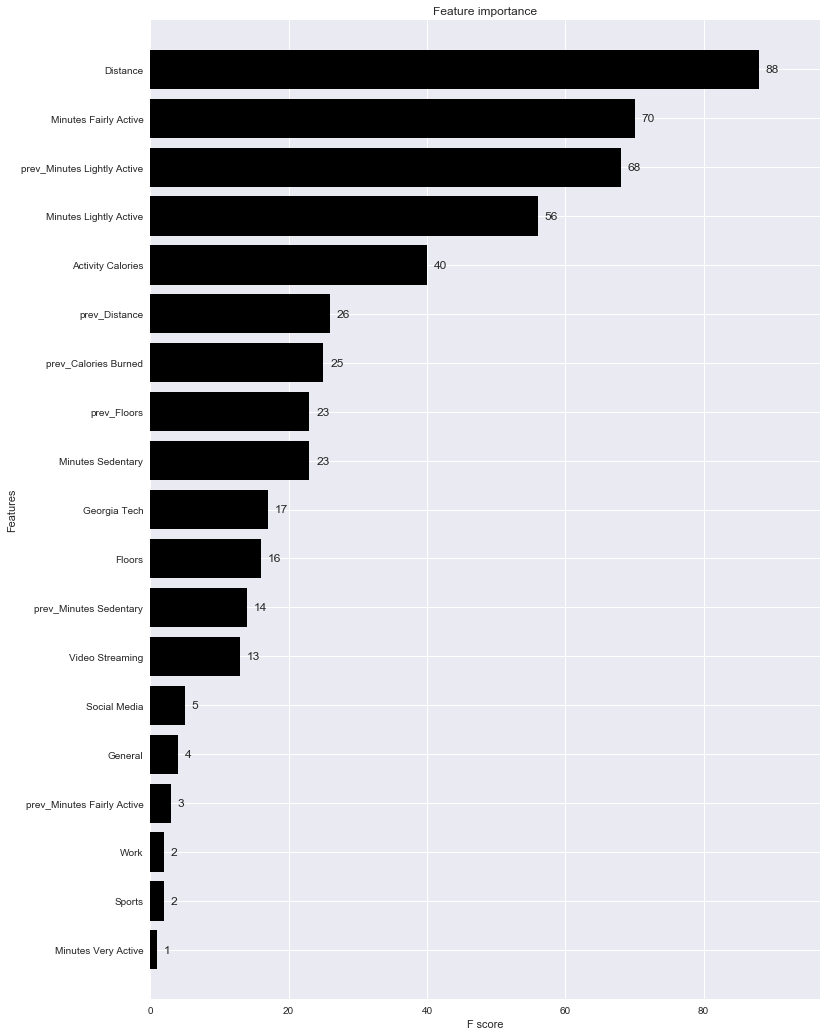

In [204]:
xgbmodel = xgb.XGBRegressor(silent=False, max_depth= 3, learning_rate=0.08, reg_alpha=0.1, reg_lambda=10)
xgbmodel.fit(X_train, y_train)
xgbmodel.feature_importances_
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(xgbmodel, max_num_features=50, height=0.8, ax=ax, color='black')
plt.show()

In [179]:
import xgbfir
xgbfir.saveXgbFI(xgbmodel, feature_names=X_train.columns, OutputXlsxFile='sleepactivityweb.xlsx')
sleepactivityweb.to_csv('final_dataset.csv')

<h2>Conclusion</h2>

From the feature importance above, 

This does nothing but confirm our hypothesis that physical activity is the most indicative of a good nights sleep.

* 'Fairly Active' minutes plays a good role in determining my quality of sleep that night. 


* Furthermore lightly active minutes both for the current day and the previous play a good role in determining deep sleep at night. From the correlation charts, lightly active minutes are closely related to **sedentary** minutes and have an *inverse relationship* with deep sleep. This implies that **not** exerting yourself can affect your sleep for atleast 2 days (if not more)


* Distance is high during the days I run to Piedmont and/or play soccer. This often results in a lot of exertion (and fairly active minutes). Also distance is higher during work days since I walk quite a bit to and from work. Distance covered during the previous day also affects sleep for the current day. Hence physical exertion is not completely overcome in a night's sleep!


* Minutes **Very** active is pretty low on the list. It is always not good to exert yourself a lot. Over exertion often leads to inconsisten physical recovery and you tend to wake up a lot more at night. Deep Sleep might increase but at the cost of REM. And when REM is inconsistent you tend you wake up.


* Surprisingly (or not) Georgia Tech scores high on that list, implying that if I have school work I sleep lesser and wake up a lot more during the night (the correlation chart seconds this). I dont know why or maybe grad school IS stressful!